<a href="https://colab.research.google.com/github/CristobalSVM/Aprendizaje-Automatico/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importar libreria para abrir xlsx o csv.
import pandas as pd

#Acceso a google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#Carga de base
bd_BR = "/content/drive/MyDrive/Tarea 2 BD_BR.xlsx"
df = pd.read_excel(bd_BR)
df

Mounted at /content/drive


,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1.0,201612.0,9.748517e+10,2.922565e+10,3.542812e+10,6.761324e+09,147.0,274.0,75627.0
1,2.0,201701.0,9.912669e+10,2.913157e+10,3.661224e+10,6.610840e+09,149.0,283.0,76116.0
2,3.0,201702.0,9.860860e+10,2.834034e+10,3.770951e+10,6.352306e+09,149.0,282.0,77057.0
3,4.0,201703.0,9.858651e+10,2.855841e+10,3.813770e+10,6.238445e+09,149.0,284.0,78379.0
4,5.0,201704.0,9.731282e+10,2.946925e+10,3.867970e+10,6.377189e+09,149.0,283.0,79406.0
...,...,...,...,...,...,...,...,...,...
56,57.0,202108.0,1.601921e+11,6.032032e+10,4.633195e+10,4.434798e+09,169.0,351.0,205704.0
57,58.0,202109.0,1.600526e+11,6.118401e+10,4.541217e+10,4.333770e+09,170.0,364.0,212165.0
58,59.0,202110.0,1.616247e+11,6.153808e+10,4.461547e+10,4.450421e+09,157.0,349.0,219334.0
59,60.0,202111.0,1.643413e+11,6.303590e+10,4.425472e+10,4.662185e+09,158.0,360.0,227138.0


In [10]:
 # Cambiar tipo de variable 
 convertir = {'id': int,
                'fecha': int,
                'sucursales': int,
                'cajeros': int,
                'tarjetas': int}  
  
df = df.astype(convertir)  

# modificar columnas fecha, activo, vista, plazo, prestamos interbancarios para tener unidades de millones de pesos
df['activo'] = df['activo']/1000000 
df['vista'] = df['vista']/1000000
df['plazo'] = df['plazo']/1000000
df['prestamos interbancarios'] = df['prestamos interbancarios']/1000000
df

,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1,201612,97485.166229,29225.647457,35428.115940,6761.324060,147,274,75627
1,2,201701,99126.687818,29131.569781,36612.242954,6610.839888,149,283,76116
2,3,201702,98608.600975,28340.337574,37709.507528,6352.305520,149,282,77057
3,4,201703,98586.509106,28558.414751,38137.700755,6238.444715,149,284,78379
4,5,201704,97312.822576,29469.246336,38679.704639,6377.189215,149,283,79406
...,...,...,...,...,...,...,...,...,...
56,57,202108,160192.052221,60320.321810,46331.947444,4434.797863,169,351,205704
57,58,202109,160052.609554,61184.005188,45412.168111,4333.770086,170,364,212165
58,59,202110,161624.690860,61538.079059,44615.468429,4450.421055,157,349,219334
59,60,202111,164341.303018,63035.903530,44254.716609,4662.184942,158,360,227138


# Tarea en clase (2 puntos)
# Aplica algún método de filtro a tus datos mediante el uso de SelectKBest

In [11]:
# Aplica algún método de filtro a tus datos mediante el uso de SelectKBest

# ANOVA de valor F

import pandas as pd

import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

y = df[['activo']]
x = df[['vista','plazo','prestamos interbancarios','sucursales','cajeros','tarjetas']]



In [12]:
#Calcular valor F

from sklearn.feature_selection import f_regression

f = f_regression(x, y)
# Regresa arreglo de estadístico F y valor p
f

(array([410.94905999,  15.47273048,   7.37113188, 357.77774154,
        349.4926592 , 282.24365219]),
 array([2.86698257e-28, 2.22938370e-04, 8.67895560e-03, 9.99088770e-27,
        1.80947167e-26, 3.70806303e-24]))

In [16]:
# Tabla de resultados F
df_f = pd.DataFrame(f[0], index=x.columns)
df_f.columns = ['f']
df_f.sort_values('f', inplace = True, ascending = False)
df_f

,f
vista,410.949060
sucursales,357.777742
cajeros,349.492659
tarjetas,282.243652
plazo,15.472730
prestamos interbancarios,7.371132


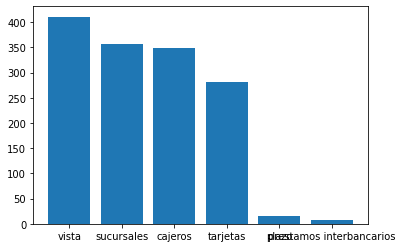

In [17]:
# Gráfica de barras del valor F
plt.figure()
plt.bar(df_f.index, df_f.f)
plt.show()

Las variables vista, sucursales, cajeros y tarjetas estan más relacionadas linealmente con la variable respuesta activo, por lo tanto, estas 4 variables son las seleccionadas.

Las variables plazo y prestamos interbancarios quedan fuera del nuevo conjunto de datos.

In [18]:
df_nuevo = df[['activo','vista','sucursales','cajeros','tarjetas']]
df_nuevo

,activo,vista,sucursales,cajeros,tarjetas
0,97485.166229,29225.647457,147,274,75627
1,99126.687818,29131.569781,149,283,76116
2,98608.600975,28340.337574,149,282,77057
3,98586.509106,28558.414751,149,284,78379
4,97312.822576,29469.246336,149,283,79406
...,...,...,...,...,...
56,160192.052221,60320.321810,169,351,205704
57,160052.609554,61184.005188,170,364,212165
58,161624.690860,61538.079059,157,349,219334
59,164341.303018,63035.903530,158,360,227138


# Valor R de correlación

In [19]:
from sklearn.feature_selection import r_regression

In [20]:
r_value = r_regression(x, y)
r_value

array([ 0.93512271,  0.45581104, -0.33325562,  0.92651915,  0.92496841,
        0.90945204])

In [21]:
df_f['r_value'] = r_value
colors = []
for v in df_f['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')

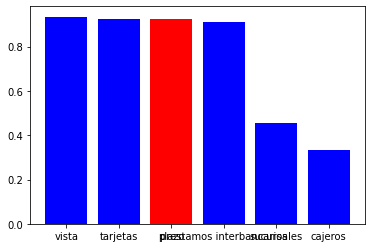

In [22]:
df_f['r_value_abs'] = df_f['r_value'].abs()
df_f.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_f.index, df_f.r_value_abs, color = colors)
plt.show()

# Umbral de varianza

In [23]:
# Normalización de variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,0.025517,0.000000,0.609207,0.000000,0.028037,0.000000
1,0.022805,0.047071,0.571442,0.076923,0.112150,0.003169
2,0.000000,0.090690,0.506562,0.076923,0.102804,0.009267
3,0.006285,0.107712,0.477988,0.076923,0.121495,0.017833
4,0.032538,0.129257,0.512806,0.076923,0.112150,0.024488
...,...,...,...,...,...,...
56,0.921731,0.433450,0.025353,0.846154,0.747664,0.842910
57,0.946624,0.396887,0.000000,0.884615,0.869159,0.884778
58,0.956830,0.365216,0.029274,0.384615,0.728972,0.931233
59,1.000000,0.350876,0.082417,0.423077,0.831776,0.981804


In [14]:
from sklearn.feature_selection import VarianceThreshold


In [15]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.08607618, 0.07807438, 0.0584518 , 0.07305728, 0.06255216,
       0.07479054])

In [24]:
# Se agregan las varianzas a los resultados
df_f['variance'] = selector.variances_
df_f.sort_values('variance', ascending = False, inplace = True)
df_f

,f,r_value,r_value_abs,variance
vista,410.949060,0.935123,0.935123,0.086076
tarjetas,282.243652,0.926519,0.926519,0.078074
cajeros,349.492659,-0.333256,0.333256,0.074791
prestamos interbancarios,7.371132,0.909452,0.909452,0.073057
sucursales,357.777742,0.455811,0.455811,0.062552
plazo,15.472730,0.924968,0.924968,0.058452


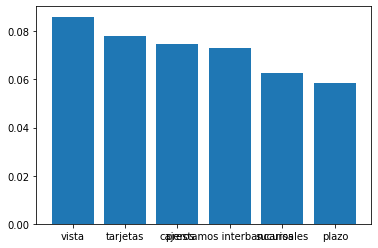

In [25]:
plt.figure()
plt.bar(df_f.index, df_f.variance)
plt.show()

# Información mutua


In [26]:
from sklearn.feature_selection import mutual_info_regression


In [27]:
mi = mutual_info_regression(x, y, random_state=0)
mi

array([1.74512955, 1.10826084, 0.82538939, 1.51058507, 1.41625738,
       1.36517093])

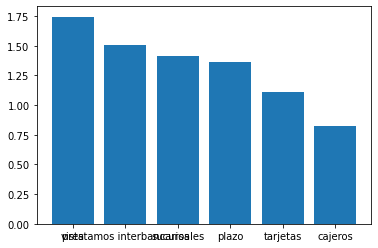

In [28]:
# Agregarlo a los resultados
df_f['mi'] = mi
df_f.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(df_f.index, df_f.mi)
plt.show()

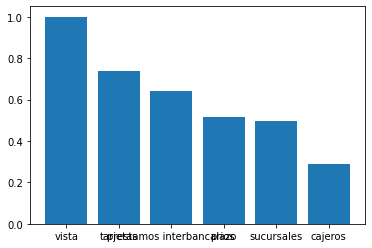

In [29]:
scaled = scaler.fit_transform(df_f)
df_f_scaled = pd.DataFrame(scaled, columns = df_f.columns)
df_f_scaled.set_index(df_f.index, inplace = True)
df_f_scaled['norm_mean'] = df_f_scaled.mean(axis = 1)
df_f_scaled.sort_values('norm_mean', ascending = False, inplace = True)

plt.figure()
plt.bar(df_f_scaled.index, df_f_scaled.mean(axis = 1))
plt.show()

# Métodos de envoltura (?) o wrapper


# Selección de características exhaustiva


In [30]:
from sklearn.linear_model import LinearRegression


In [31]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


ModuleNotFoundError: ignored

In [3]:
lr = LinearRegression()

efs = EFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 4,      # The maximum number of features to consider is 4
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy 
          cv = 5)

NameError: ignored

In [4]:
efs = efs.fit(x, y)


NameError: ignored

In [ ]:
print('Best accuracy score: %.2f' % efs.best_score_)
# print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

In [ ]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

In [ ]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_efs_best_10.feature_names.astype(str), 
    df_efs_best_10.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

# Sequential Forward Selection (SFS)


In [35]:
import joblib

#sys.modules['sklearn.externals.joblib'] = joblib

#from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [36]:
sfs = SFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          k_features = (1, 7),  # Consider any feature combination between 1 and 8
          forward = True,       # Set forward to True when we want to perform SFS
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)

NameError: ignored

In [ ]:
sfs = sfs.fit(x, y)


In [ ]:
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

In [ ]:
subsets_ = sfs.subsets_
df_sfs = pd.DataFrame(subsets_).T
df_sfs.sort_values('avg_score', ascending=False,  inplace = True)
df_sfs

In [ ]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_sfs.feature_names.astype(str), 
    df_sfs.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

# Sequential Backward Selection (SBS)


In [5]:
sbs = SFS(estimator = lr,
          k_features=(1, 7),
          forward=True,
          scoring='neg_mean_absolute_error',
          cv=5)

sbs = sbs.fit(x, y)
subsets_ = sbs.subsets_
df_sbs = pd.DataFrame(subsets_).T
df_sbs.sort_values('avg_score', ascending=False,  inplace = True)

fig = plt.figure(figsize=(20, 4))
plt.plot(
    df_sbs.feature_names.astype(str), 
    df_sbs.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

NameError: ignored

# PCA

In [32]:
from sklearn.decomposition import PCA
import numpy as np

In [33]:
pca = PCA(n_components = 3)
pca_model = pca.fit(x_scaled)

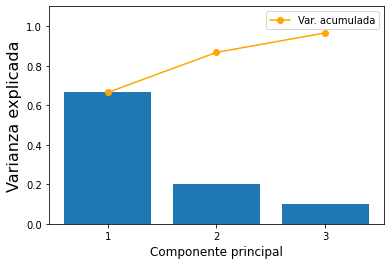

In [34]:
plt.figure()
plt.bar(np.arange(pca_model.n_components_) + 1, pca_model.explained_variance_ratio_)
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(range(1, 4),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca_model.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [35]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index = ['pca1', 'pca2', 'pca3']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3
vista,0.531881,-0.164042,0.133327
tarjetas,0.479585,-0.020957,0.303277
sucursales,0.471698,0.207620,0.036034
cajeros,0.451954,-0.116018,-0.019009
plazo,0.162951,0.838502,-0.437472
prestamos interbancarios,-0.183812,0.461517,0.834988


pca1 = 0.5319vista + 0.4796tarjetas + 0.4717sucursales + 0.452cajeros + 0.163plazo -0.1838prestamos

pca2 = -0.1640vista - 0.0210tarjetas + 0.2076sucursales - 0.1160cajeros + 0.8390plazo + 0.4615prestamos

pca3 = 0.1333vista + 0.3033tarjetas + 0.0360sucursales - 0.0190cajeros - 0.4374plazo +0.8350prestamos

# Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)

"Tomando  como  modelo  de  trabajo  a  una  institución  bancaria,  y  con  el  objetivo  de  lograr  la aplicación  de  las  medidas  antes  mencionadas,  se  inicia  por  armar  una  cartera  típica  de  dicha organización. Si bien disminuida a términos de hacer más sencillo el análisis, se trabajó sobre la combinación de depósitos y préstamos en dicha cartera." (Bacchini, Arias y Speranza, 2016).

" La entidad deberá identificar qué activos y pasivos les resultan sensibles y así, poder analizar cada situación individualmente" (Bacchini, Arias y Speranza, 2016).

"Las entradas y salidas contractuales de efectivo y de valores procedentes de todas las rúbricas de dentro y fuera de balance, asignadas a intervalos temporales definidos sobre la base de sus respectivos vencimientos." (Comité de Supervisión Bancaria de Basilea, 2013).

"Para la aplicación del presente estudio, se recabó de la entidad financiera, la información de fuentes de fondeo, que lo consituye las captaciones de depósitos con el público. La información se refiere  a los registros de los saldos diarios de las cuentas de depósitos a la vista, depósitos a plazo y depósitos restringidos." (Torres, 2019).

# Con base en tu investigación, determina las características más relevantes de tu conjunto de datos


Las características más relevantes de acuerdo a la información consultada son las variables siguientes:

-Activos
-Vista
-Plazo
-Prestamos interbancarios

# Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección


Las variables mencionadas en el punto anterior son relevantes ya que "interactúan" de forma directa, es decir, la institución capta dinero (depósitos) del público y este dinero a su vez se utiliza para fondear activos como la cartera de crédito, derivados, entre otros productos además de ser los principales rubros que aportan información en el balance de la institución Banregio.

Las variables que quedaron excluidas probablemente sea porque no hay un impacto significativo en el balance financiero ya que al tener más/menos tarjetas, sucursales y/o cajeros, ya que, en caso de que se cierren sucursales o cancelen tarjetas o se quiten cajeros, los productos que había en esos insumos se trasladan a otro punto estrategico que la institución seleccione.

Adicional a lo anterior, esa selección de variables se debe a que la información consultada, muestra un enfoque de brechas de liquidez.